## Explainability of the model using SHAP

Shape of X_shap: (100, 10)
Shape of shap_values_class1: (100, 10)


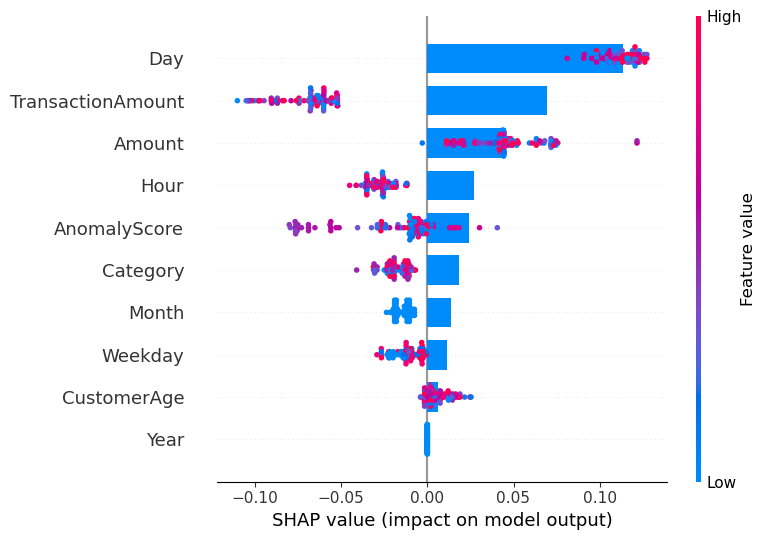

In [ ]:
import pickle
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
fraud = pd.read_csv("complete_dataset.csv")

# Preprocessing the data (Feature engineering)
fraud["Timestamp"] = pd.to_datetime(fraud["Timestamp"])
fraud["Hour"] = fraud["Timestamp"].dt.hour
fraud["Day"] = fraud["Timestamp"].dt.day
fraud["Month"] = fraud["Timestamp"].dt.month
fraud["Weekday"] = fraud["Timestamp"].dt.weekday
fraud["Year"] = fraud["Timestamp"].dt.year

# Drop columns that are not needed
fraud = fraud.drop(
    columns=[
        "Timestamp",
        "TransactionID",
        "MerchantID",
        "CustomerID",
        "MerchantName",
        "MerchantLocation",
        "CustomerName",
        "CustomerAddress",
    ]
)

# Define features and target
X = fraud.drop(columns=["FraudIndicator"])
y = fraud["FraudIndicator"]

# Initialize LabelEncoder and apply to the 'Category' column
label_encoder = LabelEncoder()
X["Category"] = label_encoder.fit_transform(X["Category"])

# Select a subset for SHAP (first 100 rows)
X_shap = X[:100]

# Load the trained model
with open("ml_model.pkl", "rb") as f:
    ml_model = pickle.load(f)

# Explainability with SHAP
explainer = shap.TreeExplainer(ml_model)
shap_values = explainer.shap_values(X_shap)

# Ensure the shape of shap_values[1] matches the number of features
shap_values_class1 = shap_values[:, :, 1]

# Since X_shap is a DataFrame, we want to ensure it has the correct column names
X_shap = X_shap.copy()  # Make sure it's a DataFrame with column names

# Check the shapes of the shap_values and X_shap to make sure they match
print(f"Shape of X_shap: {X_shap.shape}")
print(f"Shape of shap_values_class1: {shap_values_class1.shape}")

# Generate SHAP summary plots for class 1
shap.summary_plot(shap_values_class1, X_shap, plot_type="bar", show=False)
plt.savefig("shap_summary_bar.png")

shap.summary_plot(shap_values_class1, X_shap, show=False)
plt.savefig("shap_summary.png")

# Optionally: Display the plots (if needed)
# plt.show()